In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import torch
import torch.nn as nn
from pytorch_forecasting.metrics import SMAPE,RMSE,MAPE
from torch.utils.data import DataLoader,TensorDataset
from torch import FloatTensor
from torch.optim import Adam
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

/home/sjlee/sj_virtual/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
use_col = ['volumn']
data = pd.read_csv('../../traffic/data/3.csv',usecols=use_col)
data.rename({'volumn':'value'},axis=1,inplace=True)
data['value'] = data['value'] * 8 / 1000000
data

,value
0,0.220168
1,0.221584
2,0.205680
3,0.185184
4,0.173464
...,...
38875,0.166704
38876,0.172936
38877,0.172976
38878,0.169264


In [5]:
Test_data = data.iloc[:1440]
Test_data = Test_data/data.iloc[-1]
Test_data

,value
0,1.255177
1,1.263249
2,1.172580
3,1.055733
4,0.988917
...,...
1435,0.924154
1436,1.038630
1437,1.155797
1438,0.970583


<AxesSubplot: >

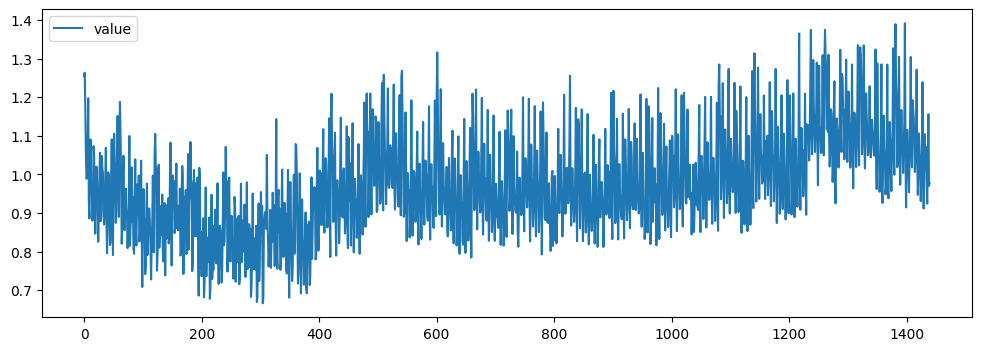

In [6]:
Test_data.plot(figsize=(12,4))

In [7]:
correlation=acf(Test_data,nlags=1440) #nlags만큼의 개수의 autocorrelation이 나옴

In [8]:
correlation=np.abs(correlation).tolist()
temp = correlation.copy()

In [9]:
len(correlation)

1440

In [10]:
temp.sort(reverse=True)
print(correlation.index(temp[1])) # 최대 index 구하기
print(correlation.index(temp[2])) # 2번째 최대 index 구하기

10
60


In [11]:
len(correlation)

1440

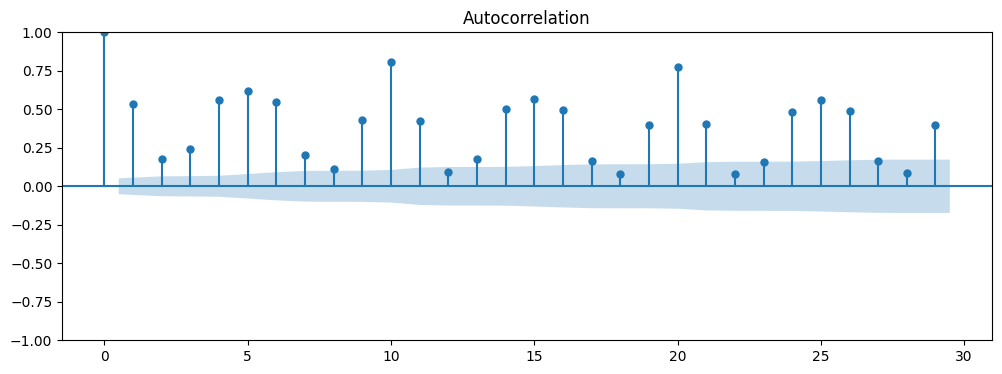

In [14]:
fig,axes = plt.subplots(1,1,figsize=(12,4))
plot_acf(x = Test_data,ax = axes,lags=np.arange(0,30));

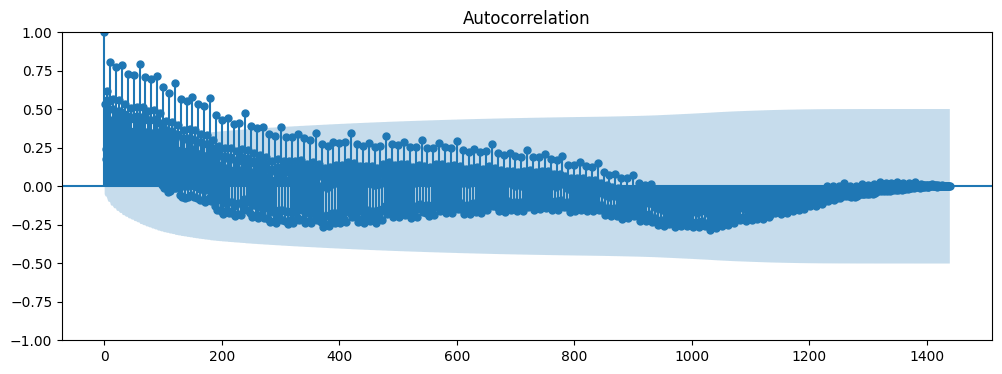

In [16]:
fig,axes = plt.subplots(1,1,figsize=(12,4))
plot_acf(x = Test_data,ax = axes,lags=np.arange(0,1440));

In [166]:
correlation=acf(data,nlags=1440) #nlags만큼의 개수의 autocorrelation이 나옴
correlation=np.abs(correlation).tolist()
temp = correlation.copy()
temp.sort(reverse=True)
print(correlation.index(temp[1])) # 최대 index 구하기
print(correlation.index(temp[2])) # 2번째 최대 index 구하기

1
2


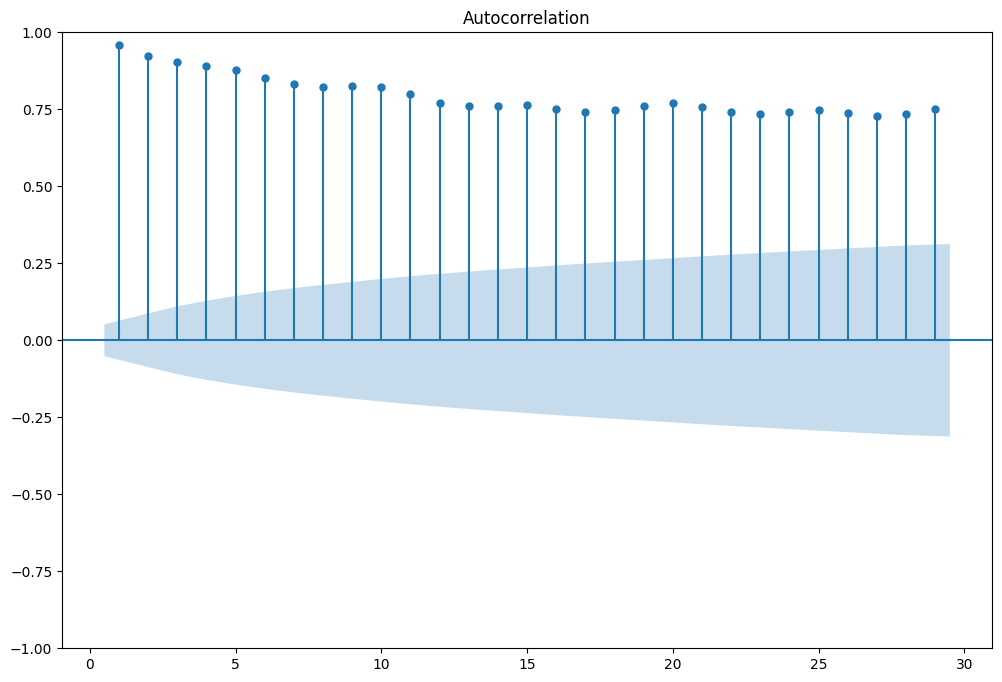

In [169]:
fig,axes = plt.subplots(1,1,figsize=(12,8))
plot_acf(x = correlation[1:],ax = axes,lags=np.arange(1,30));

In [157]:
correlation

[1.0,
 0.8750163127980108,
 0.7573147979722383,
 0.7191564790800918,
 0.7282551223357138,
 0.7205012764590387,
 0.6747925596272176,
 0.6287625202109599,
 0.5933787925055724,
 0.57163025907177,
 0.5674610099914217,
 0.5290335931199548,
 0.49722111258703916,
 0.45757519517143513,
 0.4347964970404991,
 0.43439118972662205,
 0.3935055785017762,
 0.3676395114472291,
 0.3662832405413861,
 0.38011089390477415,
 0.40034476505728683,
 0.37794175878430497,
 0.36529506619747826,
 0.36426289244668286,
 0.37581132816139956,
 0.39348448862105684,
 0.38386546684141104,
 0.36988881407132973,
 0.36919178911493994,
 0.3990159220715837,
 0.43844986657627155,
 0.40295505031578877,
 0.3744842645077064,
 0.37042982984257317,
 0.3763554682160263,
 0.3847717280895703,
 0.3821298217852107,
 0.38678936589138324,
 0.38692202846355817,
 0.3897457905822058,
 0.4029780825468665,
 0.3766383242341042,
 0.3585414994555345,
 0.3552191299861577,
 0.3710893746401375,
 0.3944764811260087,
 0.375751032147545,
 0.3633164354

In [156]:
len(temp)

1441